# Movie Recommendation System
### By Hasnat Tahir

In this project, different Movie Recommendation Systems will be created leveraging Text Analytics and Python. Further, the application and limitations of these systems will be analyzed.

In [1]:
import os
os.chdir("D:\\University\\Study Materials\\Capstone\\the-movies-dataset")

In [2]:
import pandas as pd

In [3]:
# Setting Display options 
pd.options.display.max_columns = None

# pd.set_option('display.max_columns', None)  ## not working (was for diplaying full column width) 

##### Importing the datasets

In [4]:
movies = pd.read_csv("tmdb_5000_movies.csv")

credits = pd.read_csv("tmdb_5000_credits.csv")

In [5]:
movies.info(), credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

(None, None)

In [6]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [7]:
credits.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [8]:
movies.shape, credits.shape

((4803, 20), (4803, 4))

In [9]:
master = pd.merge(movies, credits,
                 left_on = "id", right_on = "movie_id",
                 how = "inner")

In [10]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title_x                 4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [11]:
master.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [12]:
master.id.nunique(), master.original_title.nunique()  #2 duplicates in original title

(4803, 4801)

In [13]:
#finding duplicates
from collections import Counter

d =  Counter(master.original_title)
res = [k for k, v in d.items() if v > 1]
print(res)

['Batman', 'Out of the Blue']


In [14]:
master[master.original_title == "Batman"] #not duplicate

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
1359,35000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",NaN,268,"[{""id"": 848, ""name"": ""double life""}, {""id"": 84...",en,Batman,The Dark Knight of Gotham City begins his war ...,44.104469,"[{""name"": ""PolyGram Filmed Entertainment"", ""id...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1989-06-23,411348924,126.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Have you ever danced with the devil in the pal...,Batman,7.0,2096,268,Batman,"[{""cast_id"": 5, ""character"": ""Jack Napier/The ...","[{""credit_id"": ""52fe422fc3a36847f800aa4b"", ""de..."
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",NaN,2661,"[{""id"": 339, ""name"": ""submarine""}, {""id"": 849,...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He's Here Big As Life In A Real Bat-Epic,Batman,6.1,203,2661,Batman,"[{""cast_id"": 17, ""character"": ""Batman / Bruce ...","[{""credit_id"": ""52fe4363c3a36847f80509a7"", ""de..."


In [15]:
master[master.original_title == "Out of the Blue"] #not duplicate

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
3647,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,39269,"[{""id"": 4470, ""name"": ""punk""}, {""id"": 10183, ""...",en,Out of the Blue,Dennis Hopper is a hard-drinking truck driver ...,0.679351,"[{""name"": ""Robson Street"", ""id"": 71953}]","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}]",1980-05-01,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A harrowing drama from the director of Easy Rider,Out of the Blue,6.5,17,39269,Out of the Blue,"[{""cast_id"": 2, ""character"": ""Don"", ""credit_id...","[{""credit_id"": ""52fe47099251416c9106826f"", ""de..."
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,10844,"[{""id"": 2658, ""name"": ""new zealand""}, {""id"": 3...",en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,[],"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The true story of a small town massacre,Out of the Blue,5.9,18,10844,Out of the Blue,"[{""cast_id"": 12, ""character"": ""Nick Harvey"", ""...","[{""credit_id"": ""52fe43c19251416c7501cceb"", ""de..."


In [16]:
#missing values
master.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
movie_id                   0
title_y                    0
cast                       0
crew                       0
dtype: int64

4803 unique movies available
some variables contains missing values

In [17]:
master['runtime'] = master['runtime'].fillna(master['runtime'].median()) #imputing nan with median to facilitate EDA
master.runtime.isna().sum()

0

##### Exploratory Data Analysis

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

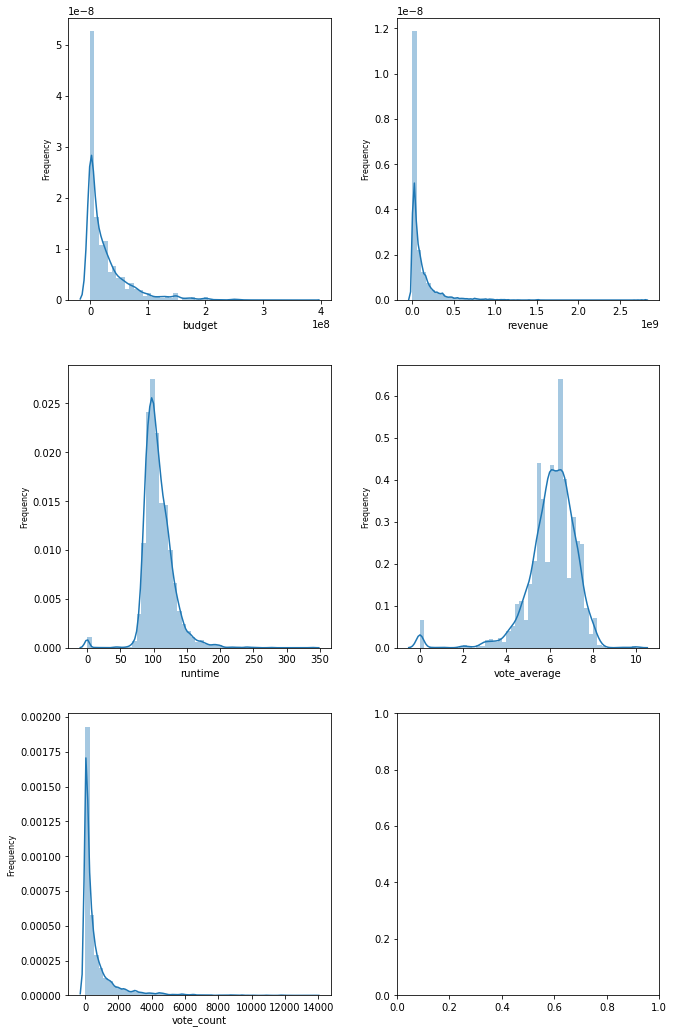

In [19]:
#histograms
col_names_hist = ['budget', 'revenue', 
                 'runtime', 'vote_average', 'vote_count']

fig, ax = plt.subplots(nrows = 3,ncols = 2, figsize=(10,15))
for i, col in enumerate(col_names_hist):
    sns.distplot(master[col], hist = True, ax=ax[i//2][i%2])
    ax[i//2][i%2].set_ylabel('Frequency', fontsize=8)
fig.tight_layout(pad =  3.0)
plt.show()

In [20]:
master.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4803.000000,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.874245,6.092172,690.217989,57165.484281
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.607364,1.194612,1234.585891,88694.614033
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,9014.500000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14629.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,117.500000,6.800000,737.000000,58610.500000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


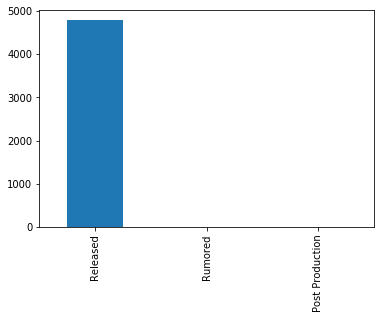

In [21]:
fig, ax = plt.subplots()
master['status'].value_counts().plot(ax=ax, kind='bar');

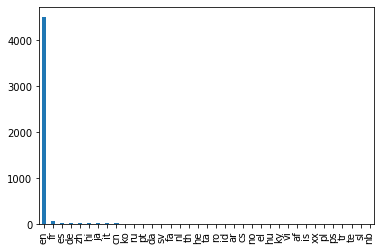

In [22]:
fig, ax = plt.subplots()
master['original_language'].value_counts().plot(ax=ax, kind='bar');

In [23]:
master.status.value_counts(), master.original_language.value_counts()

(Released           4795
 Rumored               5
 Post Production       3
 Name: status, dtype: int64, en    4505
 fr      70
 es      32
 de      27
 zh      27
 hi      19
 ja      16
 it      14
 cn      12
 ko      11
 ru      11
 pt       9
 da       7
 sv       5
 fa       4
 nl       4
 th       3
 he       3
 ta       2
 ro       2
 id       2
 ar       2
 cs       2
 no       1
 el       1
 hu       1
 ky       1
 vi       1
 af       1
 is       1
 xx       1
 pl       1
 ps       1
 tr       1
 te       1
 sl       1
 nb       1
 Name: original_language, dtype: int64)

In [24]:
#!pip install wordcloud

In [25]:
#word cloud

from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(7, 3))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

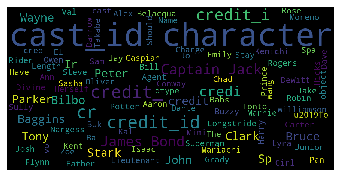

In [26]:
show_wordcloud(master.cast)

In [27]:
#show_wordcloud(master.director)

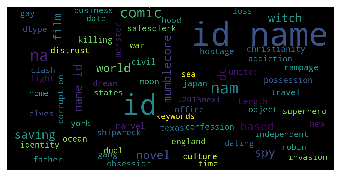

In [28]:
show_wordcloud(master.keywords)

### Demographic filtering

IMDB Weighted Rating
weighted rank (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C

 where:
  R = average for the movie
  v = number of votes for the movie
  m = minimum votes required to be listed in the chart
  C = the mean vote across the whole report

In [29]:
# Deriving the paramaeters for Weighted Rating
C = master.vote_average.mean()
C

6.092171559442011

In [30]:
# deciding the minimum number of votes required to be listed in the chart
m = master.vote_count.quantile(0.85) #all movies having more than votes than 85% movies in the list
m

1300.6999999999998

In [31]:
#filtering out movies qualified for the chart
hv_movies = master.loc[master.vote_count >= m] 

In [32]:
hv_movies.shape #721 movies qualify

(721, 24)

In [33]:
master['Weighted_rating'] = ((master.vote_count/(master.vote_count + m))* master.vote_average)+((m/(master.vote_count+m))*C)

In [34]:
master = master.sort_values('Weighted_rating', ascending = False)
master[['id','original_title',
      'vote_average', 'vote_count', 'Weighted_rating']].head(10)

,id,original_title,vote_average,vote_count,Weighted_rating
1881,278,The Shawshank Redemption,8.5,8205,8.170528
662,550,Fight Club,8.3,9413,8.031958
3232,680,Pulp Fiction,8.3,8428,8.004820
65,155,The Dark Knight,8.2,12002,7.993903
3337,238,The Godfather,8.4,5893,7.982719
96,27205,Inception,8.1,13752,7.926504
809,13,Forrest Gump,8.2,7927,7.902889
95,157336,Interstellar,8.1,10867,7.885368
329,122,The Lord of the Rings: The Return of the King,8.1,8064,7.821125
1990,1891,The Empire Strikes Back,8.2,5879,7.818138


In [35]:
#sorting movies based on popularity
pop_movie = master.sort_values('popularity', ascending = False)

In [36]:
pop_movie[['original_title', 'popularity', 'vote_average']].head(10) #top 10 most popular movies

,original_title,popularity,vote_average
546,Minions,875.581305,6.4
95,Interstellar,724.247784,8.1
788,Deadpool,514.569956,7.4
94,Guardians of the Galaxy,481.098624,7.9
127,Mad Max: Fury Road,434.278564,7.2
28,Jurassic World,418.708552,6.5
199,Pirates of the Caribbean: The Curse of the Bla...,271.972889,7.5
82,Dawn of the Planet of the Apes,243.791743,7.3
200,The Hunger Games: Mockingjay - Part 1,206.227151,6.6
88,Big Hero 6,203.734590,7.8


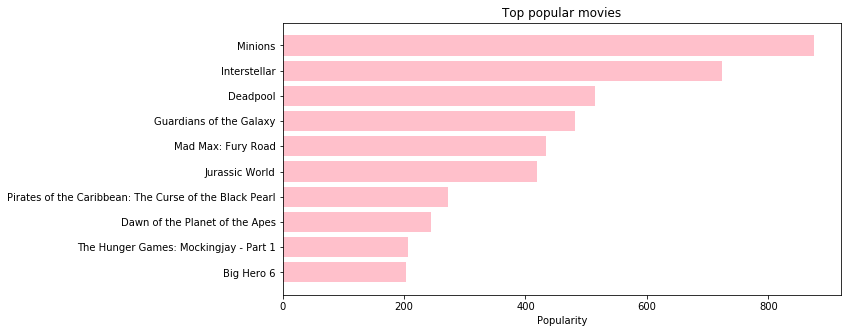

In [37]:
#plot for most popular movies
fig, ax = plt.subplots(figsize =(10, 5)) 
ax.barh(pop_movie.original_title.head(10), pop_movie.popularity.head(10), color = 'pink')
ax.set_title("Top popular movies")
ax.set_xlabel("Popularity")
ax.invert_yaxis()
plt.show();

### Content Based Filtering

In [38]:
master.overview.head(3)

1881    Framed in the 1940s for the double murder of h...
662     A ticking-time-bomb insomniac and a slippery s...
3232    A burger-loving hit man, his philosophical par...
Name: overview, dtype: object

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
tfidf = TfidfVectorizer(stop_words='english') #removing all the english stop words

In [41]:
master.overview.isna().sum() #3 missing values present

3

In [42]:
#replacing the missing value with an empty string
master.overview = master.overview.fillna('')

In [43]:
master.overview.isna().sum()

0

In [44]:
tfidf_matrix = tfidf.fit_transform(master.overview)

tfidf_matrix.shape

(4803, 20978)

In [45]:
#calculating cosine similarity
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [46]:
# a reverse map of indices and movie titles
indices = pd.Series(master.index, index=master.title_x).drop_duplicates()

In [47]:
# function to generate similar movies
def recommender(title):
    idx = indices[title]
    scores = sorted(list(enumerate(cosine_sim[idx])), key=lambda x: x[1], reverse=True)
    scores = scores[1:6] #top 5 similar movies
    movie_indices = [i[0] for i in scores]
    return master.title_x.iloc[movie_indices]

In [48]:
recommender('The Dark Knight Rises')

3                         The Dark Knight Rises
428                              Batman Returns
3854    Batman: The Dark Knight Returns, Part 2
299                              Batman Forever
1359                                     Batman
Name: title_x, dtype: object

In [49]:
recommender('Superman')

1281                 Hackers
3002       The Lawnmower Man
2484    The Thirteenth Floor
419                   Jumper
1161      The Social Network
Name: title_x, dtype: object

#### Adding more data for similar movie filtering
The function is doing a great job recommending movies based on plot overview. We observe that recommendation for Batman movies contain all the Batman movies and same in the case of Superman. If a person liked “The Dark Knight Rises” or “Superman” just because of the director and not the overview, in such a case this recommender is not generating relevant recommendations. So, the quality of recommendations can be improved by increasing the scope of data, we can do it by adding other details such as actors, directors, genre, etc. 

In [50]:
#pd.set_option('display.max_colwidth', 1000) ## displays full length cells
master.cast.head(1) #it's a stringified list

1881    [{"cast_id": 3, "character": "Andy Dufresne", ...
Name: cast, dtype: object

In [51]:
master.crew.head(1) #can parse director name from this column

1881    [{"credit_id": "52fe4231c3a36847f800b153", "de...
Name: crew, dtype: object

In [52]:
# converting back to usable list
from ast import literal_eval

features = ['genres', 'keywords', 'cast', 'crew']
for feature in features:
    master[feature] = master[feature].apply(literal_eval)

In [53]:
#functions for extracting details
#director
import numpy as np

def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

# function for extracting important names
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []

In [54]:
# new director, cast, genres and keywords features that are in a suitable form.
master['director'] = master.crew.apply(get_director)

In [55]:
features = ['genres', 'keywords', 'cast']
for feature in features:
    master[feature] = master[feature].apply(get_list)

In [56]:
master[['title_x', 'cast', 'director', 'keywords', 'genres']].head(5)  #proper format

,title_x,cast,director,keywords,genres
1881,The Shawshank Redemption,"[Tim Robbins, Morgan Freeman, Bob Gunton]",Frank Darabont,"[prison, corruption, police brutality]","[Drama, Crime]"
662,Fight Club,"[Edward Norton, Brad Pitt, Meat Loaf]",David Fincher,"[support group, dual identity, nihilism]",[Drama]
3232,Pulp Fiction,"[John Travolta, Samuel L. Jackson, Uma Thurman]",Quentin Tarantino,"[transporter, brothel, drug dealer]","[Thriller, Crime]"
65,The Dark Knight,"[Christian Bale, Heath Ledger, Aaron Eckhart]",Christopher Nolan,"[dc comics, crime fighter, secret identity]","[Drama, Action, Crime]"
3337,The Godfather,"[Marlon Brando, Al Pacino, James Caan]",Francis Ford Coppola,"[italy, love at first sight, loss of father]","[Drama, Crime]"


In [57]:
#converting the names and keyword instances into lowercase and strip all the spaces between them
def clean_up(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [58]:
features = ['cast', 'keywords', 'director', 'genres']
for feature in features:
    master[feature] = master[feature].apply(clean_up)

In [59]:
# combining everything for vectorizer
def combine_all(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
master['mix'] = master.apply(combine_all, axis=1)

In [60]:
master.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew,Weighted_rating,director,mix
1881,25000000,"[drama, crime]",NaN,278,"[prison, corruption, policebrutality]",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-09-23,28341469,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,278,The Shawshank Redemption,"[timrobbins, morganfreeman, bobgunton]","[{'credit_id': '52fe4231c3a36847f800b153', 'de...",8.170528,frankdarabont,prison corruption policebrutality timrobbins m...


In [61]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(master.mix)

In [62]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim1 = cosine_similarity(count_matrix, count_matrix)

In [63]:
master01 = master.reset_index()
indices = pd.Series(master01.index, index=master01.title_x)

In [64]:
def recommend_movies(title):
    idx = indices[title]
    scores = sorted(list(enumerate(cosine_sim1[idx])), key=lambda x: x[1], reverse=True)
    scores = scores[1:6] #top 5 similar movies
    movie_indices = [i[0] for i in scores]
    return master.title_x.iloc[movie_indices]

In [65]:
recommend_movies('Kung Fu Hustle')

3099                 Shaolin Soccer
2262                            CJ7
1918    Big Trouble in Little China
4638       Amidst the Devil's Wings
4401            The Helix... Loaded
Name: title_x, dtype: object

In [66]:
recommend_movies('Superman')

870                          Superman II
2433    Superman IV: The Quest for Peace
14                          Man of Steel
1296                        Superman III
10                      Superman Returns
Name: title_x, dtype: object

We can say that our recommender has been successful in capturing more information due to more metadata and has given us better recommendations.

### Collaborative Filtering

In [67]:
# importing another dataset for getting user IDs
ratings = pd.read_csv("ratings_small.csv")

ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [68]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader = Reader()

In [69]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [70]:
svd = SVD()

In [71]:
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8984  0.8883  0.8997  0.8994  0.8994  0.8971  0.0044  
MAE (testset)     0.6921  0.6851  0.6921  0.6921  0.6897  0.6902  0.0027  
Fit time          10.80   12.13   13.19   11.14   11.74   11.80   0.83    
Test time         0.29    0.28    0.46    0.28    0.48    0.36    0.09    


{'test_rmse': array([0.89841358, 0.88833574, 0.89972263, 0.89944413, 0.89936748]),
 'test_mae': array([0.69210329, 0.68512728, 0.69209969, 0.6920896 , 0.68971495]),
 'fit_time': (10.801700830459595,
  12.126174926757812,
  13.193720579147339,
  11.143676280975342,
  11.740609169006348),
 'test_time': (0.29321885108947754,
  0.28421640396118164,
  0.4631927013397217,
  0.2783167362213135,
  0.481555700302124)}

In [72]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [73]:
ratings[ratings.userId == 30].head(10)

,userId,movieId,rating,timestamp
5048,30,1,4.0,944943070
5049,30,2,2.0,945277634
5050,30,6,4.0,945276746
5051,30,8,4.0,968786809
5052,30,11,4.0,948141296
5053,30,14,4.0,945276564
5054,30,16,5.0,945115684
5055,30,18,2.0,945277971
5056,30,21,5.0,945276705
5057,30,23,4.0,945278756


In [74]:
svd.predict(30,11)

Prediction(uid=30, iid=11, r_ui=None, est=3.948840033854151, details={'was_impossible': False})

In [75]:
svd.predict(30,8)

Prediction(uid=30, iid=8, r_ui=None, est=3.664167578152076, details={'was_impossible': False})

### Hybrid Filtering

In [76]:
meta = pd.read_csv('movies_metadata.csv')

C:\Users\hasna\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [77]:
#meta['id'] = meta.id.astype(int) 
meta[meta.id.str.contains('-', regex= True, na=False)]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Midnight Man,False,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Mardock Scramble: The Third Exhaust,False,7.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,Avalanche Sharks,False,4.3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
meta = meta.drop([19730, 29503, 35587]) #dropping abnormal values for conversion of id to int

In [79]:
meta['id'] = meta.id.astype(int)

In [80]:
link = pd.read_csv('links_small.csv')
link = link[link.tmdbId.notnull()].tmdbId.astype('int')

In [81]:
meta01 = meta[meta.id.isin(link)]
meta01.shape

(9099, 24)

In [82]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [83]:
idmap = pd.read_csv('links_small.csv')[['movieId', 'tmdbId']]
idmap['tmdbId'] = idmap['tmdbId'].apply(convert_int)
idmap.columns = ['movieId', 'id']
idmap = idmap.merge(meta01[['title', 'id']], on='id').set_index('title')
indices_map = idmap.set_index('id')

In [84]:
def hybrid(userId, title):
    idx = indices[title]
        
    sim_scores = list(enumerate(cosine_sim[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = meta01.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'id']]
    movies['est'] = movies['id'].apply(lambda x: svd.predict(userId, indices_map.loc[x]['movieId']).est)
    movies = movies.sort_values('est', ascending=False)
    return movies.head(10)

In [85]:
hybrid(100,'Kung Fu Hustle')

,title,vote_count,vote_average,id,est
1135,Delicatessen,320.0,7.4,892,4.163742
1064,Sophie's Choice,149.0,7.4,15764,3.899891
2606,Trick,24.0,6.7,1812,3.783484
6094,Born Free,38.0,6.5,15347,3.780604
4473,Harlem Nights,85.0,5.7,9085,3.710806
3801,Stranger Than Paradise,112.0,7.4,469,3.655959
5682,Standing in the Shadows of Motown,12.0,7.0,30192,3.574028
5131,Death to Smoochy,133.0,5.9,9275,3.562984
5609,Gallipoli,111.0,7.1,11646,3.546592
5341,Z,87.0,8.0,2721,3.541009


In [86]:
hybrid(1,'Kung Fu Hustle')

,title,vote_count,vote_average,id,est
1135,Delicatessen,320.0,7.4,892,3.253302
1064,Sophie's Choice,149.0,7.4,15764,3.228169
5341,Z,87.0,8.0,2721,3.002514
5609,Gallipoli,111.0,7.1,11646,2.960073
2606,Trick,24.0,6.7,1812,2.906249
4473,Harlem Nights,85.0,5.7,9085,2.876394
5682,Standing in the Shadows of Motown,12.0,7.0,30192,2.870246
6094,Born Free,38.0,6.5,15347,2.838995
749,The Grass Harp,4.0,6.1,46732,2.815149
3210,Ghost Dog: The Way of the Samurai,306.0,7.2,4816,2.768178


It can be observed from the above output tables that for the same movie we are getting different movie recommendations for different users. We have successfully built a Hybrid Recommendation System that provides recommendations based on both content and user preferences. 

----

#### Evaluating Content-based recommendation system

In [87]:
master.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew,Weighted_rating,director,mix
1881,25000000,"[drama, crime]",NaN,278,"[prison, corruption, policebrutality]",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-09-23,28341469,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,278,The Shawshank Redemption,"[timrobbins, morganfreeman, bobgunton]","[{'credit_id': '52fe4231c3a36847f800b153', 'de...",8.170528,frankdarabont,prison corruption policebrutality timrobbins m...
662,63000000,[drama],http://www.foxmovies.com/movies/fight-club,550,"[supportgroup, dualidentity, nihilism]",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",1999-10-15,100853753,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,550,Fight Club,"[edwardnorton, bradpitt, meatloaf]","[{'credit_id': '55731b8192514111610027d7', 'de...",8.031958,davidfincher,supportgroup dualidentity nihilism edwardnorto...
3232,8000000,"[thriller, crime]",NaN,680,"[transporter, brothel, drugdealer]",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-10-08,213928762,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,680,Pulp Fiction,"[johntravolta, samuell.jackson, umathurman]","[{'credit_id': '52fe4269c3a36847f801caa3', 'de...",8.004820,quentintarantino,transporter brothel drugdealer johntravolta sa...


In [88]:
link01 = pd.read_csv('links_small.csv')

In [89]:
link01.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [90]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [91]:
exp = pd.merge(master, link01,
                 left_on = "id", right_on = "tmdbId",
                 how = "inner")

In [92]:
master.shape, link01.shape, exp.shape

((4803, 27), (9125, 3), (3404, 30))

In [93]:
expx = pd.merge(ratings, exp,
                 on = "movieId",
                 how = "inner")

In [94]:
expx.shape

(66947, 33)

In [95]:
def recommend_movies1(title):
    idx = indices[title]
    scores = sorted(list(enumerate(cosine_sim1[idx])), key=lambda x: x[1], reverse=True)
    scores = scores[1:11] #top 10 similar movies
    movie_indices = [i[0] for i in scores]
    p = master.title_x.iloc[movie_indices]
    return pd.DataFrame({'id':p.index, 'original_title':p.values})

In [96]:
expx.original_title.nunique()

3393

In [97]:
#expx['clean_title'] = expx.original_title.str.replace('\W', '')
#expx['clean_title'] = expx['original_title'].str.replace(r'[^\w\s]+', '')

In [98]:
ulist = expx.original_title.unique().tolist()
ulist2 = ulist[0:45]

In [99]:
d = pd.DataFrame()
for i in ulist2:
    rec = recommend_movies1(i)
    rec['movie'] = i
    d = d.append(rec)
    
d.columns = ['id', 'Recommended_movies', 'selected_movie']
d.head()

,id,Recommended_movies,selected_movie
0,1556,Mystic River,Sleepers
1,1369,Cape Fear,Sleepers
2,826,Disclosure,Sleepers
3,377,The Devil's Own,Sleepers
4,2915,Trash,Sleepers


In [100]:
last_master = pd.merge(d, expx, left_on = 'selected_movie', right_on = 'original_title', how = 'inner')

In [101]:
last_master.columns

Index(['id_x', 'Recommended_movies', 'selected_movie', 'userId', 'movieId',
       'rating', 'timestamp', 'budget', 'genres', 'homepage', 'id_y',
       'keywords', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title_x', 'vote_average', 'vote_count', 'movie_id',
       'title_y', 'cast', 'crew', 'Weighted_rating', 'director', 'mix',
       'imdbId', 'tmdbId'],
      dtype='object')

In [102]:
last1 = last_master[['Recommended_movies', 'selected_movie', 'userId',"rating"]]

In [103]:
last_final = pd.merge(last1, expx, left_on = ['Recommended_movies', 'userId'], right_on = ['original_title', 'userId'], 
                      how = 'inner')

In [104]:
last_final1 = last_final[['userId','selected_movie','Recommended_movies','rating_x','rating_y']]
last_final1.columns = ['userId','selected_movie','Recommended_movies','rating_selected','rating_recommended']

In [105]:
last_final1.loc[last_final1.userId == 23].head()

,userId,selected_movie,Recommended_movies,rating_selected,rating_recommended
0,23,Sleepers,Mystic River,3.5,3.5
10,23,Sleepers,Cape Fear,3.5,4.0
93,23,The Deer Hunter,Taxi Driver,3.0,5.0
94,23,Cape Fear,Taxi Driver,4.0,5.0
133,23,The Deer Hunter,Apocalypse Now,3.0,5.0


In [106]:
last_final2 = last_final1.sort_values(['userId', 'selected_movie']) #sorted
last_final2.head()

,userId,selected_movie,Recommended_movies,rating_selected,rating_recommended
296,1,Cape Fear,Sleepers,2.0,3.0
8,1,Sleepers,Cape Fear,3.0,2.0
1499,2,Apollo 13,Philadelphia,5.0,4.0
1599,2,Batman Forever,Batman,4.0,5.0
1600,2,Wolf,Batman,3.0,5.0


In [107]:
last_final2['Deviation'] = last_final2.rating_selected - last_final2.rating_recommended
last_final2.head()

,userId,selected_movie,Recommended_movies,rating_selected,rating_recommended,Deviation
296,1,Cape Fear,Sleepers,2.0,3.0,-1.0
8,1,Sleepers,Cape Fear,3.0,2.0,1.0
1499,2,Apollo 13,Philadelphia,5.0,4.0,1.0
1599,2,Batman Forever,Batman,4.0,5.0,-1.0
1600,2,Wolf,Batman,3.0,5.0,-2.0


In [112]:
# irrelevant recommendations
last_final2['Correct'] = [1 if x >= -1 and x <= 1 else 0 for x in last_final2['Deviation']] 
last_final2.head(10)

,userId,selected_movie,Recommended_movies,rating_selected,rating_recommended,Deviation,Correct?,Correct
296,1,Cape Fear,Sleepers,2.0,3.0,-1.0,1,1
8,1,Sleepers,Cape Fear,3.0,2.0,1.0,1,1
1499,2,Apollo 13,Philadelphia,5.0,4.0,1.0,1,1
1599,2,Batman Forever,Batman,4.0,5.0,-1.0,1,1
1600,2,Wolf,Batman,3.0,5.0,-2.0,0,0
3448,3,Speed,Young Guns,2.5,4.0,-1.5,0,0
1810,4,Batman Forever,Superman,4.0,5.0,-1.0,1,1
833,4,GoldenEye,First Blood,4.0,4.0,0.0,1,1
2782,4,Pulp Fiction,Reservoir Dogs,5.0,5.0,0.0,1,1
410,4,Star Trek: The Motion Picture,Star Trek IV: The Voyage Home,4.0,3.0,1.0,1,1


In [113]:
last_final2.Correct.mean() #accuracy

0.7582951945080092